### Test transit noise estimate

 Generate white noise in a time series with gaps then measure the noise in a sliding window using the transit_noise function.

In [1]:
%pylab inline
from pycheops.instrument import transit_noise

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = 60/86400 # 1-minute cadence

time = concatenate((arange(0.0,0.45,d),
                    arange(0.5,0.9,d),
                    arange(1.0,1.4,d),
                    arange(1.5,2.0,d)))
sigma_true = (400 + 400*(time/max(time)))*1e-6

flux = np.random.normal(1,sigma_true)
sigma = sigma_true/2

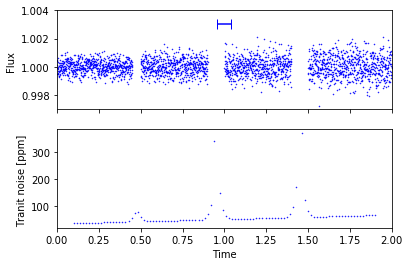

In [3]:
W = 2 # hours
T = linspace(0.1, 1.9, 100)
N = empty_like(T)
F = empty_like(T)

for i,_t in enumerate(T):
    _n,_f = transit_noise(time, flux, sigma, T_0=_t, width=W)
    N[i] = _n
    F[i] = _f

fig,ax=subplots(2,1,figsize=(6,4),sharex=True)
ax[0].set_xlim(min(time),max(time))
ax[0].plot(time, flux,'b.',ms=1)
ax[0].set_ylabel("Flux ")
ax[0].set_ylim(0.997,1.004)
ax[0].errorbar(median(T),1.003,xerr=W/24/2,
           capsize=5,color='b',ecolor='b')
ax[1].plot(T,N,'b.',ms=1)
ax[1].set_ylabel("Tranit noise [ppm] ")
ax[1].set_xlabel("Time");

&copy; Pierre Maxted, Keele University, 2019